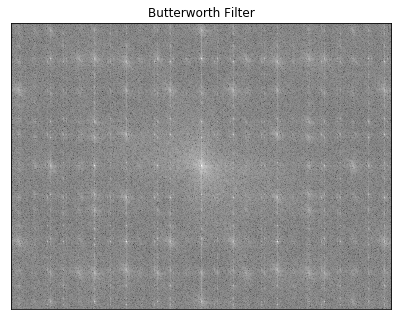

In [1]:
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread('images/moonWalk.jpg',0)
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
imgfreq = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

fig = plt.figure(figsize=(15,15))
plt.subplot(221),plt.imshow(imgfreq , cmap = 'gray')
plt.title('Butterworth Filter'), plt.xticks([]), plt.yticks([])   
plt.show()


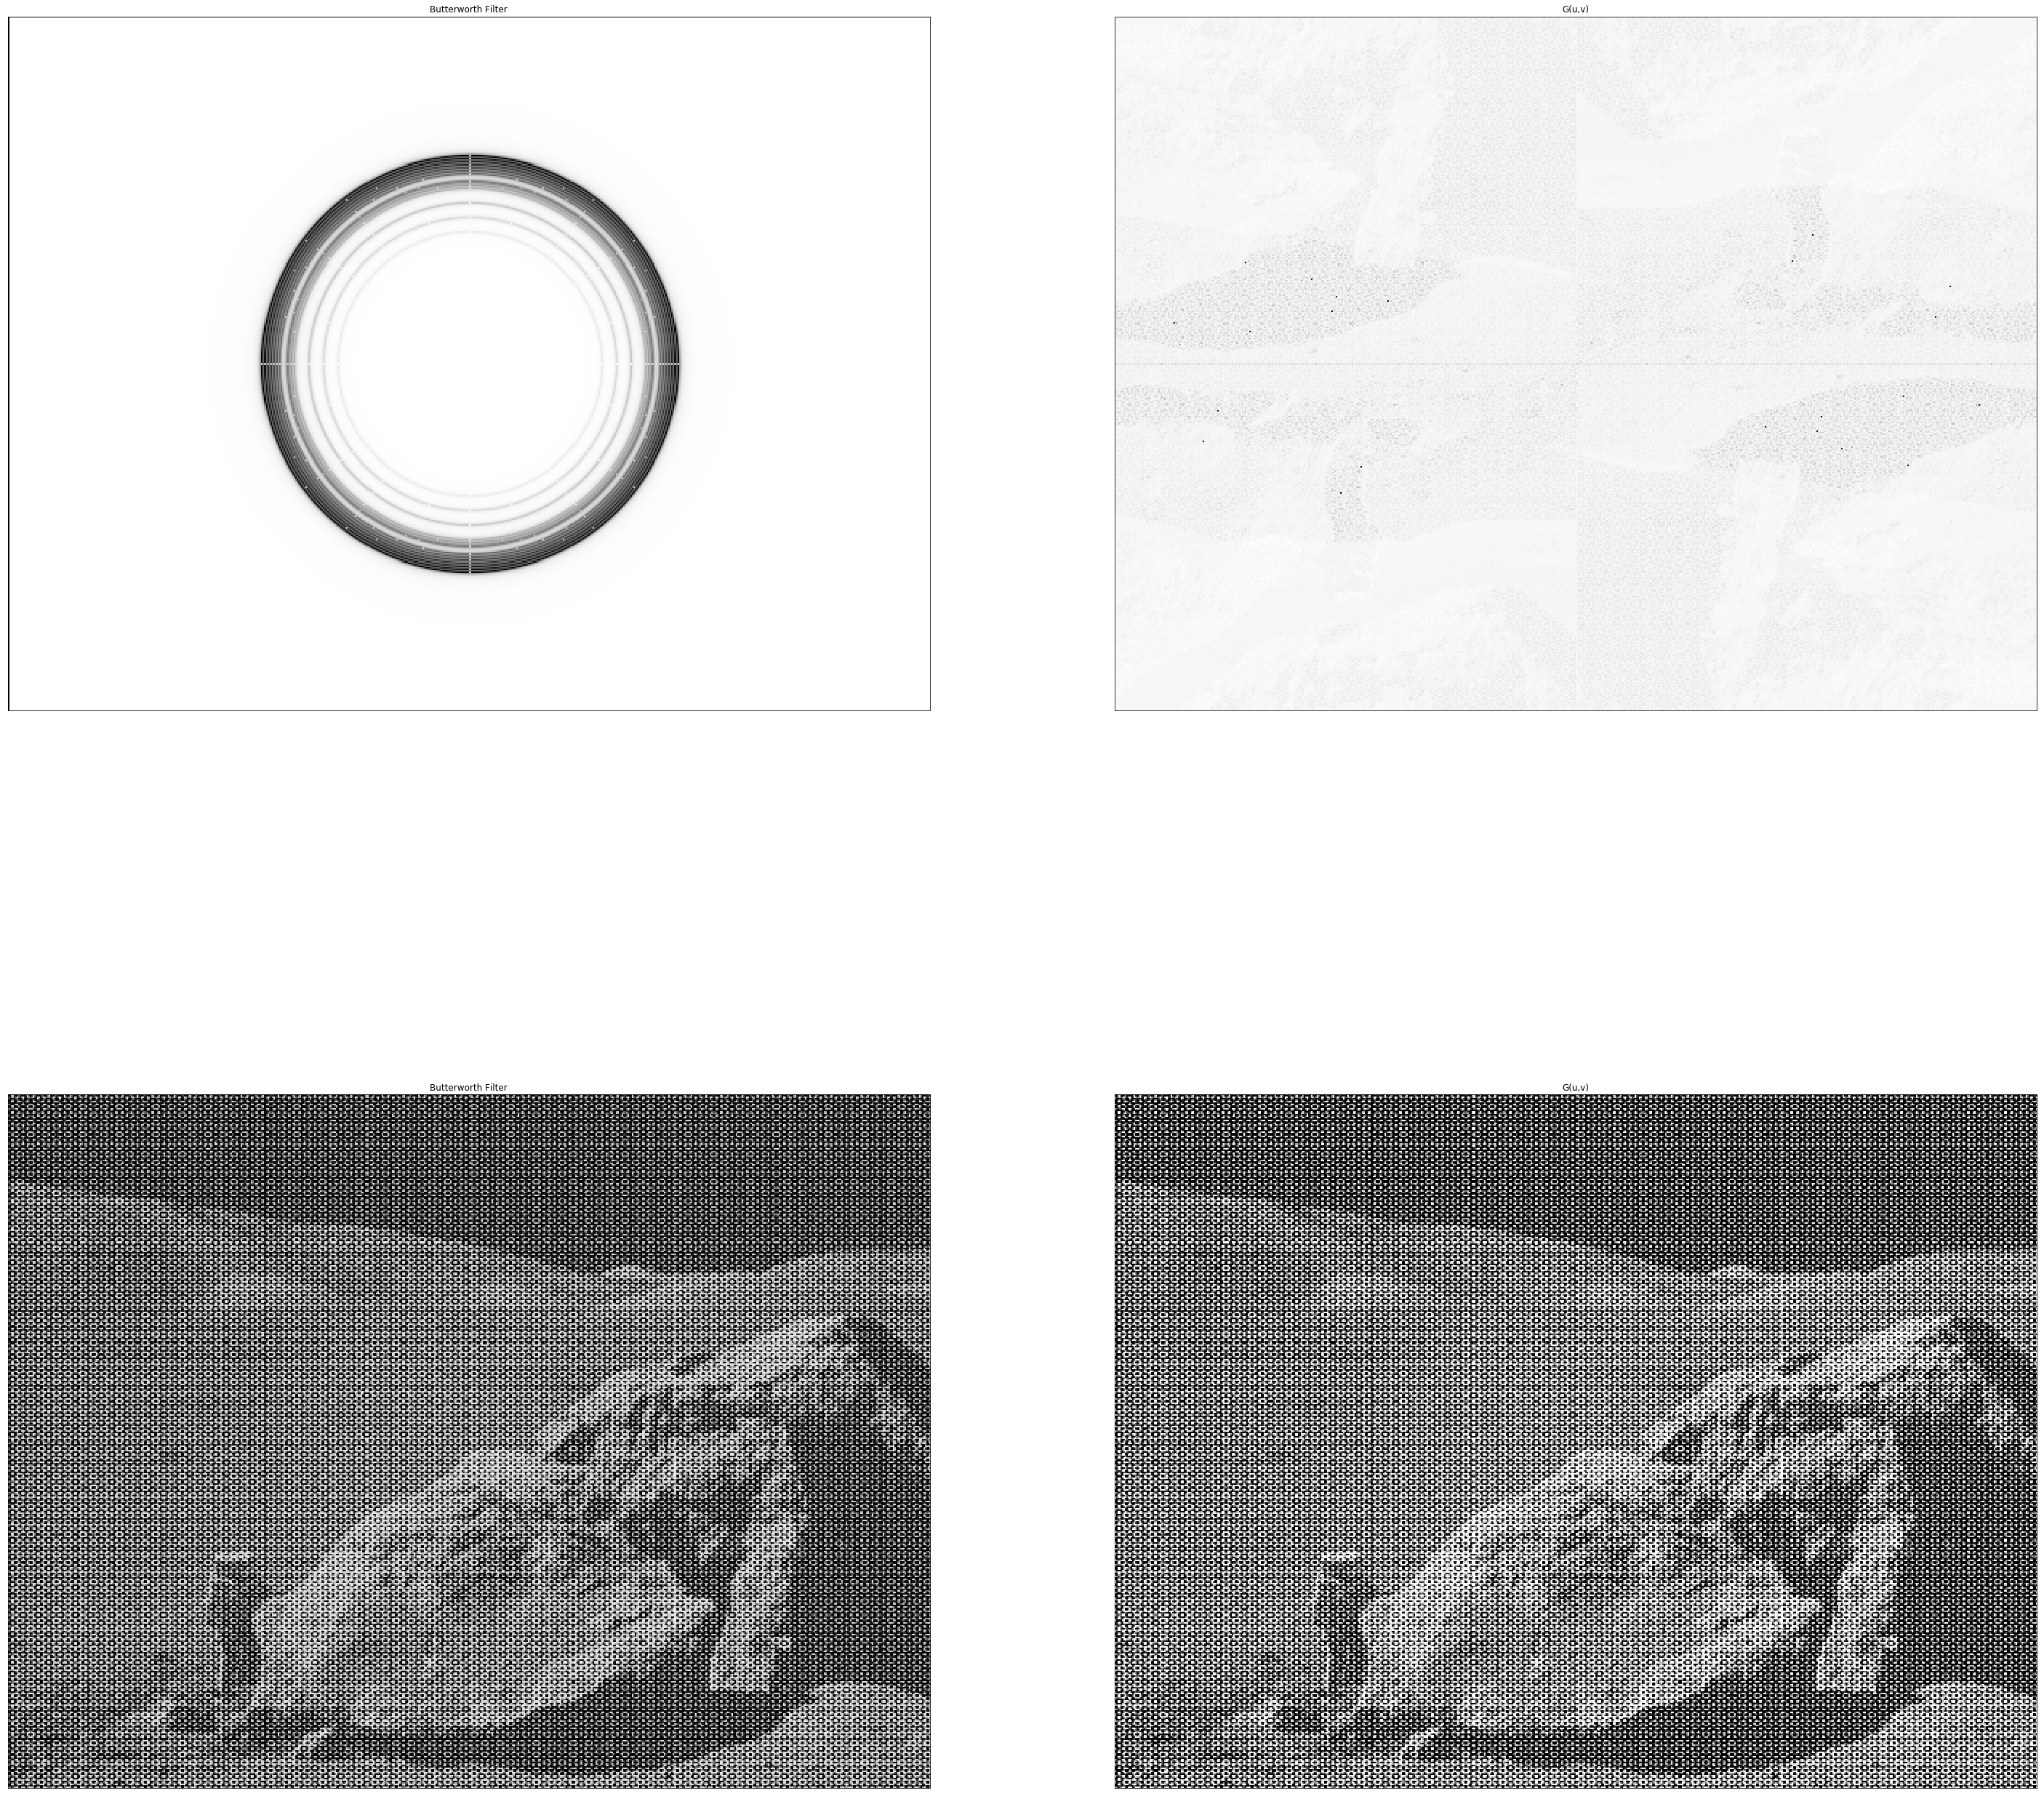

In [18]:
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt2
a = cv2.imread('images/moonwalk.jpg',0)

a2 = cv2.imread('images/filter.jpg',0)

c = np.fft.fft2(a)
d = np.fft.fftshift(c)


u = d.shape[0]
v = d.shape[1]
arraylow = numpy.zeros((u,v))
arrayheigh = numpy.zeros((u,v))
arrayfinal = numpy.zeros((u,v))
c1 = u/2 
c2 = v/2

dl=[90,100,110,120,122,124,125,130,132,134,136,138,140,142]
dh=100
t2 = 10
t3 = 1

def D(i,j):
    value=((i-u/2)**2)+((j-v/2)**2)
    return value**0.5
w=300

for zs in range(0,14):
    for i in range(1,u):
        for j in range(1,v):
            r1 = (i-c1)**2+(j-c2)**2
            r = math.sqrt(r1)
            #value=1/(1+((D(u,v)/Dz)**(n**2)))
            try:arraylow[i,j] =1/(1+(r*w)/((r**2)-((dl[zs])**2))**(2*t3))
            except ZeroDivisionError as err:arraylow[i,j]=0
            try:
                if arraylow[i,j]==0:arraylow[i,j] =1/(1+(r*w)/((r**2)-((dl[zs]*2)**2))**(2*t3))
            except ZeroDivisionError as err:arraylow[i,j]=0    
            #arraylow[i,j] = 1/(1+((r/dl)**(t2**2)))
            arrayheigh[i,j] =1/(1+((r/dh)**(t3**2)))
            arrayfinal[i,j]== 1-arrayheigh[i,j]
            arrayfinal[i,j] =  arraylow[i,j] * arrayfinal[i,j]
    arrayfinal=arrayfinal-arraylow
        
        



        #Ideal Low Pass  Filter
#----------------------------------------
for i in range(u):
    for j in range(v):
        ;#if dl>=D(i,j):arraylow[i,j]=1
        #if dh>=D(i,j):arrayheigh[i,j]=1
#IdelFilter = scipy.misc.toimage(H1)
#convolution1 = dft_shift * IdelFilter 
#IdelFilter = abs(fftim.ifft2(convolution1))

#----------------------------------------
        
    
# Butterworth  Low Pass Filter
#----------------------------------------
n=2
array=np.zeros((u,v))
for i in range(u):
    for j in range(v):
        value=1/(1+((D(i,j)/dl[0])**(n**2)))
        array[i,j]=value
butterworth = scipy.misc.toimage(array)

#----------------------------------------        

#arrayfinal = arraylow
arrayfinal=1-arrayfinal
arrayfinal = scipy.misc.toimage(arrayfinal)
#arrayheigh = scipy.misc.toimage(arrayheigh)
#arraylow = scipy.misc.toimage(arraylow)



convolution2 = d*arrayfinal

e2 = abs(fftim.ifft2(convolution2))


fig = plt.figure(figsize=(50,50))
plt.subplot(221),plt.imshow(arrayfinal , cmap = 'gray')
plt.title('Butterworth Filter'), plt.xticks([]), plt.yticks([])   
plt.subplot(222),plt.imshow(imgfreq, cmap = 'gray')
plt.title('G(u,v)'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(e2 , cmap = 'gray')
plt.title('Butterworth Filter'), plt.xticks([]), plt.yticks([])   
plt.subplot(224),plt.imshow(a, cmap = 'gray')
plt.title('G(u,v)'), plt.xticks([]), plt.yticks([])
plt.show()
